DBSCAN es un modelo de clustering (agrupar datos) para aprendizaje no supervisado (con datos no etiquetados) basado en densidad, es decir, un cluster (grupo) es una región densa de puntos seárada por regiones poco densas de otras regiones densas. Es útil cuando los cluster tienes formas irregulares, están entrelazados o hay ruido en los datos.
Considera qué tan próximo está una muestra de otra según dos parámetros: 
* epsilon (eps): Densidad, número de puntos en un radio especifico
* minPts (min_samples): Un punto es core (puntos interiores de un cluster) si tinene, al menos, un número mínimo de puntos minPts en su vecindario de radio epsilon.


In [1]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.describe()

,i,q,n_obs_used,H,albedo,moid
count,98077.000000,98077.000000,98077.000000,98077.000000,98077.000000,98077.000000
mean,10.223316,2.404852,664.018190,15.170565,0.129808,1.421578
std,6.599541,0.472348,574.774298,1.385889,0.109591,0.469509
min,0.042710,0.081882,5.000000,5.280000,0.006000,0.000307
25%,5.097552,2.072469,221.000000,14.400000,0.053000,1.086490
50%,9.306794,2.367493,490.000000,15.300000,0.078000,1.387730
75%,13.606279,2.687182,962.000000,16.100000,0.188000,1.700050
max,71.178071,5.275309,3876.000000,24.700000,1.000000,4.279410


In [4]:
X = data[['i', 'q', 'n_obs_used', 'H', 'albedo', 'moid']]
y = data['Danger']

In [5]:
scaler = MinMaxScaler().fit(X)
X_scaler = scaler.transform(X)

In [6]:
X_scaler

array([[0.14888922, 0.51805837, 0.23172307, 0.44902163, 0.23843058,
        0.41708109],
       [0.19941368, 0.52502767, 0.29010592, 0.4284243 , 0.05533199,
        0.43441884],
       [0.18607141, 0.53644874, 0.06225781, 0.52111226, 0.0221328 ,
        0.44867883],
       ...,
       [0.02453114, 0.54527568, 0.03435805, 0.57775489, 0.01710262,
        0.44702194],
       [0.35506579, 0.47871129, 0.0364247 , 0.53141092, 0.02716298,
        0.39617016],
       [0.01317677, 0.4997742 , 0.34022216, 0.42327497, 0.06438632,
        0.38948652]])

In [7]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaler)

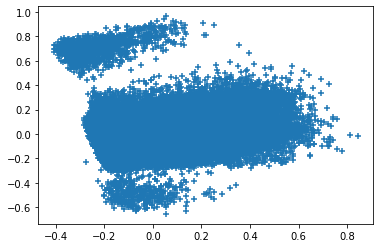

In [8]:
plt.scatter(X_2d[:,0], X_2d[:,1], marker='+',)

En este caso los datos tienen una forma irregular, por lo que usar DBSCAN es una buena alternativa, frente a por ej., k-means

In [9]:
db = DBSCAN(eps=0.05, min_samples=100).fit(X_2d)

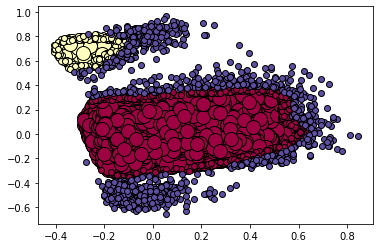

In [10]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)

    xy = X_2d[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_2d[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.show()

Como se puede ver en el grafico de arriba, DBSCAN agrupó correctamente cada punto en cada uno de los dos clusters que se forman

In [12]:
score = silhouette_score(X_2d, labels=labels)

In [13]:
score

0.4706510907366347